In [1]:
# 決定實際進行模型比較的演算法

In [2]:
from utils import *

import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
import scikitplot as skplt
import seaborn as sns
import shutil
import sys    


In [3]:
# 初始化繪布
set_default_figure()


In [4]:
# 取得今日日期
today = datetime.date.today().strftime('%Y%m%d')

# 設定目錄名稱 - 不同 test_size 差別
plot_type_name = 'model_selection'


In [5]:
# 工作區
workspace = os.path.join("./plot", today, plot_type_name)

try:
    shutil.rmtree(workspace)
except:
    pass

os.makedirs(workspace)

def getImageName(filename: str):
    """
    取得圖片檔保存路徑
    """
    return os.path.join( workspace, filename )
    

In [6]:
base = load_pickles('base-all')

Loading pickle: ./pickle/base-all-20200122.pickle
Loading pickle: ./pickle/base-all-20200126.pickle


In [7]:
# 將回傳結果中的 key 
keys = list(base.keys())
keys.sort(reverse=True)

# 本例只使用最新的那一組


In [8]:
model_selection = pd.DataFrame(columns=['model_name', 'test_kappa'])
for model in base[keys[0]]:
    rec = {'model_name': model['model_name'], 'test_kappa': model['test_kappa'] }
    model_selection = model_selection.append(rec, ignore_index=True)

In [9]:
model_selection.set_index('model_name', inplace=True)

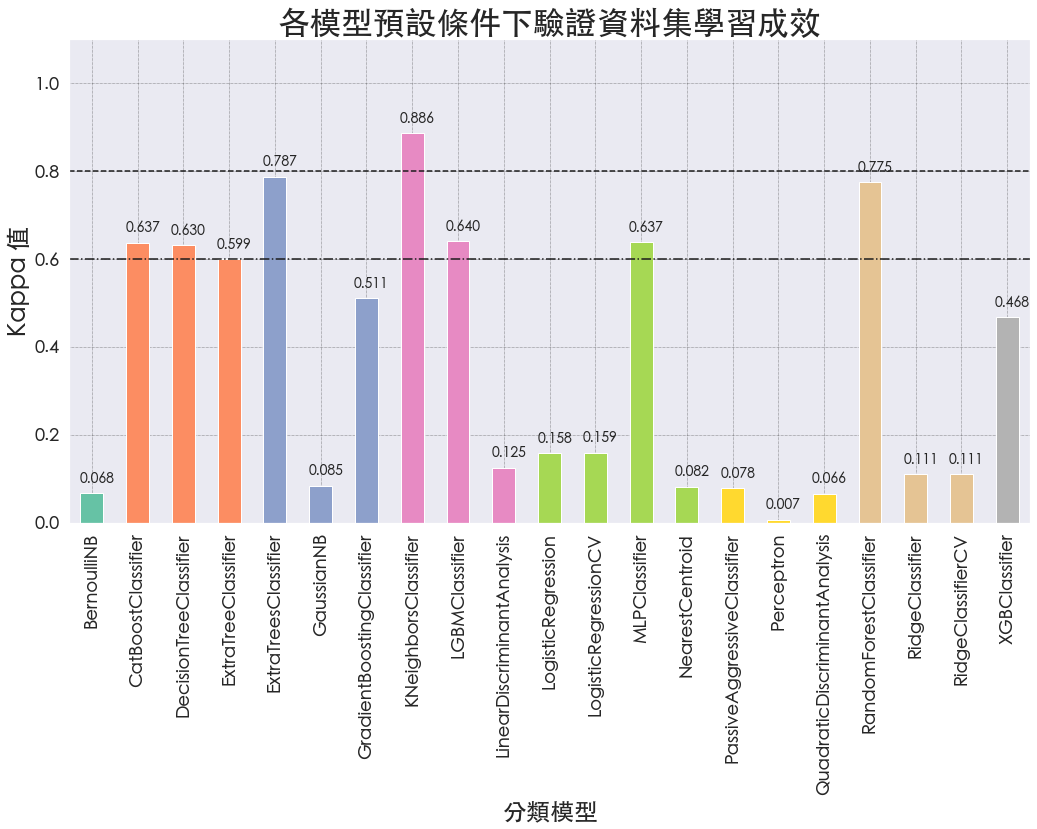

In [10]:
# 色彩
colors = plt.cm.Set2(np.linspace(.1, .9, model_selection.shape[0]))
# 填充圖樣
hatching_pattern = ['//', '\\\\', 'xx', '--', '++', 'oo', '..', '**', 'OO', 
                    '////','\\\\\\\\', 'xxxx', '--++', 'oo--', '..//', '**..', 'OO**',
                    '//\\', '//xx', '//oo', '//**', 'o+o+']
hatching_pattern.reverse()


xlabels=list(model_selection.index)


# 繪製長條圖
ax = model_selection.plot(kind='bar', 
                  figsize=(15,12), 
                  ylim=(0,1.1),
                  legend=False, color=[colors])
ax.set_xticklabels(xlabels,rotation=90)

# 繪製材質
# for i, a in enumerate(ax.patches):
#     hatch = hatching_pattern[i]
#     a.set_hatch(hatch)
    
# 標示績效 
for idx, label in enumerate(list(model_selection.index)): 
    for name in model_selection.columns:
        value = np.round(model_selection.iloc[idx][name], 3)
        ax.annotate(f'{value:.03f}',
                    (idx, value),
                     xytext=(5, 10), 
                     textcoords='offset points',
                    ha='center',
                    fontsize=14
                   )
    
# 繪製 Kappa 門檻值
xlim = ax.get_xlim()
ax.hlines(0.6, xlim[0], xlim[1], linestyle='dashdot' )
ax.hlines(0.8, xlim[0], xlim[1], linestyle='dashed'  )

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel('Kappa 值', fontsize=24)
plt.xlabel('分類模型', fontsize=24)

plt.title("各模型預設條件下驗證資料集學習成效", fontsize="32")


plt.subplots_adjust(bottom=0.37, top=0.93, left=0.08, right=0.97, hspace=0, wspace=0)

imgName = getImageName('model_selection.png')
plt.savefig(imgName)
    
plt.show()
plt.close()
